In [7]:
import os
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# Constants

In [8]:
lead_times = [0, 2, 4, 6, 8]
#
experiment = "SIC_Attention_Res_UNet"
#
date_min = "20220101"
date_max = "20221231"
period = date_min + "_" + date_max
#
path_scores = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/"
path_output = "/lustre/storeB/users/cyrilp/COSI/Figures/Article/"
if os.path.isdir(path_output) == False:
    os.system("mkdir -p " + path_output)
#
list_predictors = ["LSM", "TOPAZ_SIC", "initial_bias", "T2m", "wind", "SICobs", "SICtrend"]
#
sizefont = 25
sizefont_legend = 18
linewidth = 3

# Functions

In [9]:
def read_dataset(experiment, period, list_predictors, leadtime):    
    path_ref = path_scores + experiment + "/lead_time_" + str(leadtime) + "_days/scores/"
    #
    Dataset = {}
    Dataset["All_predictors"] = pd.read_csv(path_ref + "Scores_" + period + ".txt", delimiter = "\t")
    #
    for var in list_predictors:
        path_missing_predictor = path_scores + experiment + "_without_" + var + "/lead_time_" + str(leadtime) + "_days/scores/"
        Dataset[var] = pd.read_csv(path_missing_predictor + "Scores_" + period + ".txt", delimiter = "\t")
    #
    for var in Dataset:
        Dataset[var] = Dataset[var].dropna(how = 'all', axis = 1)
    #
    return(Dataset)

In [10]:
def Mean_scores(Dataset):
    Mean_scores = {}
    #
    for var in Dataset:
        df = Dataset[var]
        #
        for metric in df:
            if metric != "start_date":
                Mean_scores[var + "_" + metric] = str(round(np.mean(df[metric]), 2))
    #
    return(Mean_scores)

In [11]:
def make_figure_difference_several_ice_edges(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = False):
    #
    colorscale = plt.cm.tab10
    colors = colorscale(np.linspace(0, 1, len(list_predictors)))
    lead_times_fig = [str(x) for x in (np.array(lead_times) + 1)]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 4, figsize = (40, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(141)
    for v, var in enumerate(list_predictors):
        RMSE_diff = Scores[var + "_RMSE_ML"] - Scores["All_predictors_RMSE_ML"]
        l = ax.plot(lead_times_fig, RMSE_diff, color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("RMSE difference", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in RMSE (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #ax.set_ylim([])
    #
    ax = plt.subplot(142)
    for v, var in enumerate(list_predictors):
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_10_ML"]) - np.array(Scores["All_predictors_IIEElength_10_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("Ice edge distance error difference (10 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #
    ax = plt.subplot(143)
    for v, var in enumerate(list_predictors):
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_15_ML"]) - np.array(Scores["All_predictors_IIEElength_15_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("Ice edge distance error difference (15 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #
    ax = plt.subplot(144)
    for v, var in enumerate(list_predictors):
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_20_ML"]) - np.array(Scores["All_predictors_IIEElength_20_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var, linewidth = linewidth)
    ax.grid(alpha = 0.2)
    ax.set_title("Ice edge distance error difference (20 % SIC)", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    #
    if saving == True:
        plt.savefig(path_output + "Predictor_importances_difference_" + experiment + "_" + date_min + "_" + date_max + ".png", bbox_inches = "tight")
    else:
        plt.show()
#####################
def make_figure_difference(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = False):
    #
    colorscale = plt.cm.tab10
    colors = colorscale(np.linspace(0, 1, len(list_predictors)))
    lead_times_fig = [str(x) for x in (np.array(lead_times) + 1)]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(1, 2, figsize = (25, 10), facecolor = "w", edgecolor = "k")
    #
    ax = plt.subplot(121)
    for v, var in enumerate(list_predictors):
        var_label = var.replace("_", " ").replace("LSM", "land sea mask").replace("T2m", "ECMWF T2m").replace("wind", "ECMWF wind").replace("initial bias", "TOPAZ initial error").replace("SICobs", "AMSR2 SIC").replace("SICtrend", "AMSR2 SIC trend")
        RMSE_diff = Scores[var + "_RMSE_ML"] - Scores["All_predictors_RMSE_ML"]
        l = ax.plot(lead_times_fig, RMSE_diff, color = colors[v], label = var_label, linewidth = linewidth)
        print("RMSE difference", var, RMSE_diff, np.mean(RMSE_diff))
    ax.grid(alpha = 0.4)
    ax.set_title("RMSE difference", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in RMSE (%)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    ax.legend(fontsize = sizefont_legend, loc = 'upper right', ncol = 1)
    ax.text(-0.1,-0.05, "a)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #
    ax = plt.subplot(122)
    for v, var in enumerate(list_predictors):
        var_label = var.replace("_", " ").replace("LSM", "land sea mask").replace("T2m", "ECMWF T2m").replace("wind", "ECMWF wind").replace("initial bias", "TOPAZ initial error").replace("SICobs", "AMSR2 SIC").replace("SICtrend", "AMSR2 SIC trend")
        IIEElength_diff = 0.001 * (np.array(Scores[var + "_IIEElength_15_ML"]) - np.array(Scores["All_predictors_IIEElength_15_ML"]))
        l = ax.plot(lead_times_fig, IIEElength_diff , color = colors[v], label = var_label, linewidth = linewidth)
        print("IIEElength difference", var, IIEElength_diff, np.mean(IIEElength_diff))
    ax.grid(alpha = 0.4)
    ax.set_title("Ice edge distance error difference", fontsize = sizefont, fontweight = "bold")
    ax.set_ylabel("Difference in ice edge distance error (km)", fontsize = sizefont)
    ax.set_xlabel("Lead time (days)", fontsize = sizefont)
    #ax.legend(fontsize = sizefont_legend, loc = 'best', ncol = 2)
    ax.text(-0.1,-0.05, "b)", fontsize = sizefont, ha = "left", transform = ax.transAxes) 
    #
    if saving == True:
        plt.savefig(path_output + "Predictor_importances_missing_predictor_" + experiment + "_" + date_min + "_" + date_max + ".png", bbox_inches = "tight")
    else:
        plt.show()

# Data processing

RMSE difference LSM [-0.02  0.27  0.21 -0.04  0.14] 0.11199999999999992
RMSE difference TOPAZ_SIC [ 0.13  0.14  0.23 -0.01  0.29] 0.15600000000000006
RMSE difference initial_bias [-0.1   0.17  0.39  0.24  0.1 ] 0.15999999999999978
RMSE difference T2m [0.04 0.13 0.3  0.03 0.06] 0.11199999999999992
RMSE difference wind [0.38 1.25 0.89 0.66 0.43] 0.7219999999999999
RMSE difference SICobs [-0.04  0.13  0.28  0.12  0.35] 0.16799999999999962
RMSE difference SICtrend [0.04 0.15 0.25 0.12 0.07] 0.1259999999999998
IIEElength difference LSM [ 0.166    1.39006  0.73907 -1.86911 -0.21499] 0.04220600000000015
IIEElength difference TOPAZ_SIC [ 0.2524   1.40804  1.41166 -0.98125  0.44611] 0.5073920000000001
IIEElength difference initial_bias [-0.03859  0.82215  1.64952 -0.47405  0.55371] 0.502548
IIEElength difference T2m [ 0.14753  0.66864  1.03194 -1.76785 -0.62922] -0.10979200000000038
IIEElength difference wind [1.16145 1.69905 6.47555 2.05494 1.04312] 2.4868219999999996
IIEElength difference SIC

<Figure size 640x480 with 0 Axes>

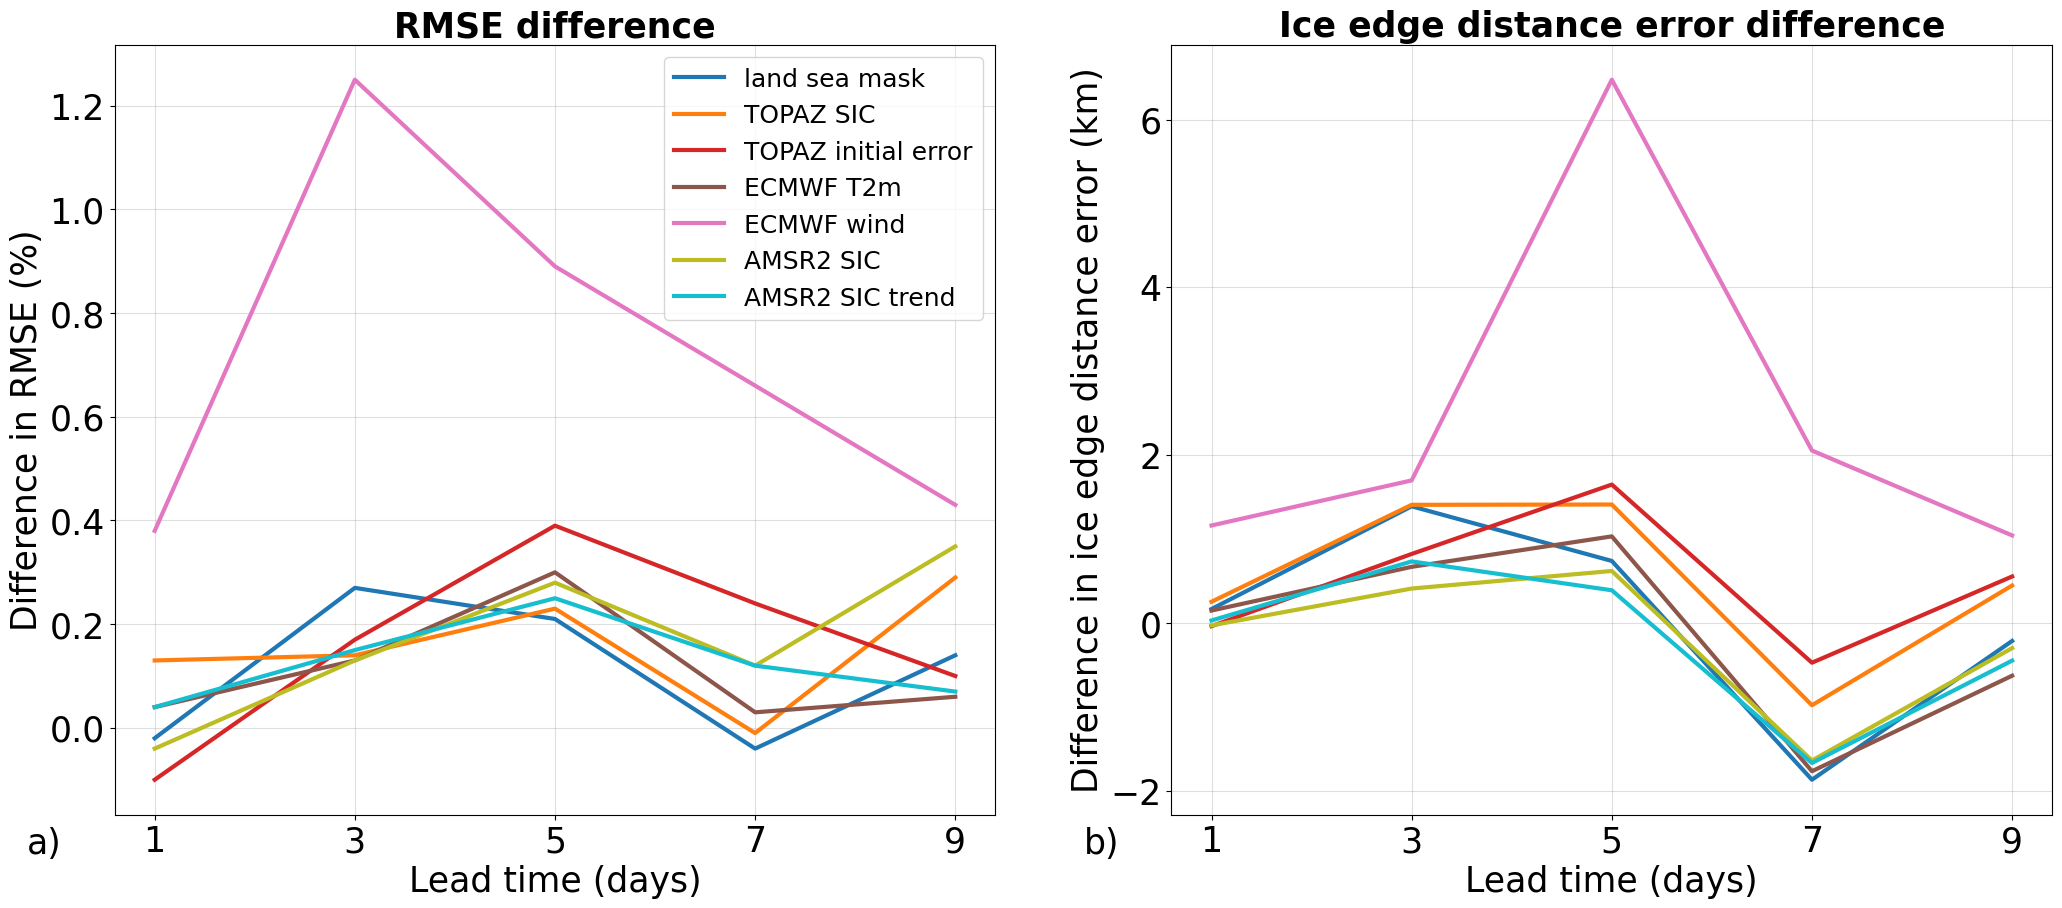

In [12]:
Scores = {}
#
for lt, leadtime in enumerate(lead_times):
    Dataset = read_dataset(experiment, period, list_predictors, leadtime)
    Scores_lt = Mean_scores(Dataset)
    #
    if lt == 0:
        for var in Scores_lt:
            Scores[var] = np.full(len(lead_times), np.nan)
            Scores[var][lt] = float(Scores_lt[var])
    #
    else:
        for var in Scores_lt:
            Scores[var][lt] = float(Scores_lt[var])
#
#make_figure_absolute(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = False)
make_figure_difference(Scores, list_predictors, lead_times, sizefont, sizefont_legend, saving = True)